# Importation des packages

In [7]:
import jax
import numpyro

numpyro.set_host_device_count(2)
jax.config.update("jax_enable_x64", True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jaxoplanet.orbits import keplerian
from jaxoplanet.units import unit_registry as ureg

### Création d'une fausse exoplanète orbitant une fausse étoile

In [11]:
truth = dict(radial_velocity_semiamplitude = 5.0*ureg.m/ureg.s, period = 5.0*ureg.days)
star = keplerian.Central(mass=1.0, radius=1.0)
system = keplerian.System(star).add_body(**truth)

### Création des fausses données RV

c:\Users\tabas\anaconda3\envs\starterenv\lib\site-packages\matplotlib\axes\_axes.py:3586: UserWarning: The unit of a Quantity is stripped when downcasted to an array.
  y = np.asarray(y, dtype=object)


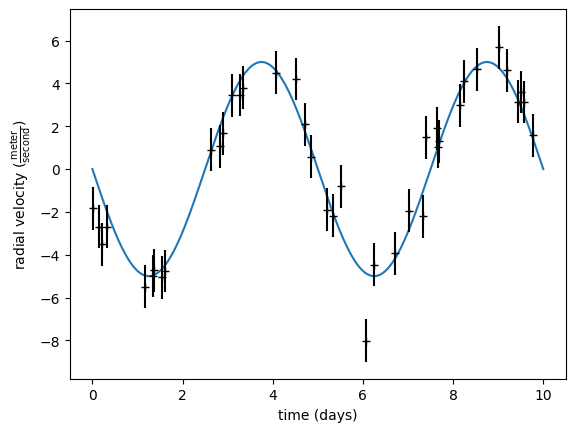

In [ ]:
# Generate synthetic data in m/s
np.random.seed(12)
over_time = np.linspace(0, 10, 1000)
over_rvs = system.radial_velocity(over_time)[0].to(ureg.m/ureg.s)

time = np.sort(np.random.uniform(0, 10, 40))
rv_obs = system.radial_velocity(time)[0].to(ureg.m/ureg.s)
rv_err = 1.0 * rv_obs.units  # Error in m/s
rv_obs += rv_err * np.random.normal(size=len(time))


def plot_data():
    plt.errorbar(time, rv_obs, yerr=rv_err.magnitude, fmt="+k")
    plt.xlabel("time (days)")
    plt.ylabel(f"radial velocity (${rv_obs.units:L}$)")


plt.plot(over_time, over_rvs.magnitude)
plot_data()

Missions: 

1. Créer une fonction qui prend en entrée les temps des observations et les paramètres de la planète et qui sort les vitesses radiales correspondantes. 
2. Tenter de déterminer les paramètres de la planète cachée dans les données du fichier `mystery_planet.csv`. 

Import the csv file and print the data to prepare for analysis

In [8]:
df = pd.read_csv("mystery_planet.csv")

In [9]:
df

,time,rv_obs,rv_err
0,0.067777,0.932718,0.79
1,0.098639,-1.594154,0.79
2,0.177281,0.694910,0.79
3,0.437249,0.167021,0.79
4,0.624294,-1.924832,0.79
...,...,...,...
95,28.708480,-3.234929,0.79
96,28.722523,-3.413966,0.79
97,28.877907,-2.303740,0.79
98,29.341742,-3.272259,0.79


In [122]:
print(df.keys())

Index(['time', 'rv_obs', 'rv_err'], dtype='object')


#### Create a **fake** star and planet

In [50]:
truth = dict(radial_velocity_semiamplitude = 3.6*ureg.m/ureg.s, period = 2.7*ureg.days)
star = keplerian.Central(mass=1.0, radius=1.0)
systemNew = keplerian.System(star).add_body(**truth)

#### Use **reaaaal** radial speed data

In [51]:
def plot_data():
    plt.errorbar(df["time"], df["rv_obs"], yerr=df["rv_err"], fmt="+k")
    plt.xlabel("time (days)")
    plt.ylabel(f"radial velocity (${rv_obs.units:L}$)")

#over_time = np.linspace(df["time"].min, df["time"].max, 1000)
#plt.plot(df["time"], df["rv_obs"])


In [52]:
maxtime = df["time"].max()
mintime = df["time"].min()
timeGraph = np.linspace(mintime, maxtime, 1000)

In [ ]:
amplitude = ((df["rv_obs"].max() + df["rv_obs"].min()) / 2) - 0.79
amplitude

np.float64(0.2565485321270513)

In [118]:
truth = dict(radial_velocity_semiamplitude = 2.82*ureg.m/ureg.s, period = 6.69*ureg.days)
star = keplerian.Central(mass=1.0, radius=1.0)
systemNew = keplerian.System(star).add_body(**truth)

In [ ]:
radVel = systemNew.radial_velocity(timeGraph)[0].to(ureg.m/ureg.s)

c:\Users\tabas\anaconda3\envs\starterenv\lib\site-packages\matplotlib\cbook.py:1398: UserWarning: The unit of a Quantity is stripped when downcasted to an array.
  return np.asarray(x, float)


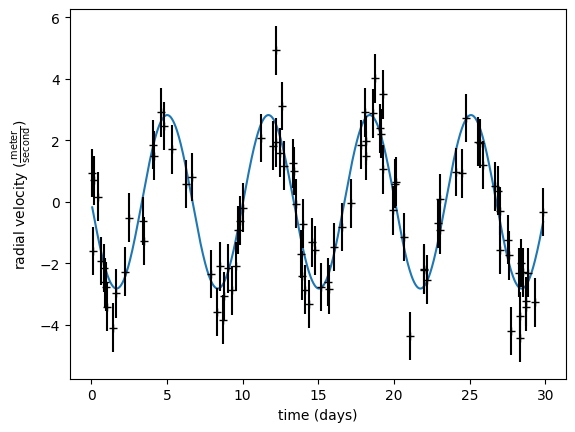

In [ ]:
plt.plot(timeGraph, radVel)
plot_data()

In [121]:
p = 2.75
k = 6.69

In [ ]:
sum = 0
#plt.plot(df["time"].values, radVel)
df["time"].values
for time in df["time"].values:
    sum += np.abs(df["time"].values -) 

sum/100

0.0